In [113]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

druid SignificanceResult(statistic=-0.46336592556834816, pvalue=1.369565914370823e-98)
MSE 1224.5603798582024


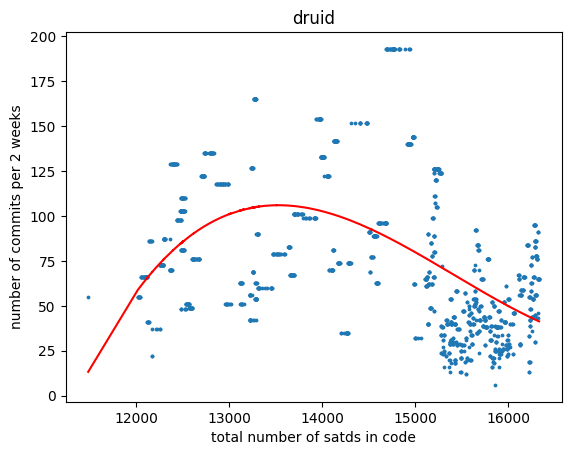

dubbo SignificanceResult(statistic=-0.3695595573249841, pvalue=2.323636222771351e-26)
MSE 603.1076942558258


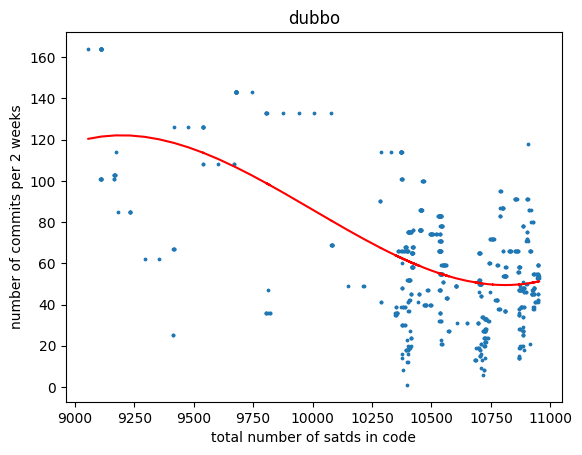

flink SignificanceResult(statistic=0.6042935598160251, pvalue=0.0)
MSE 11413.172061646992


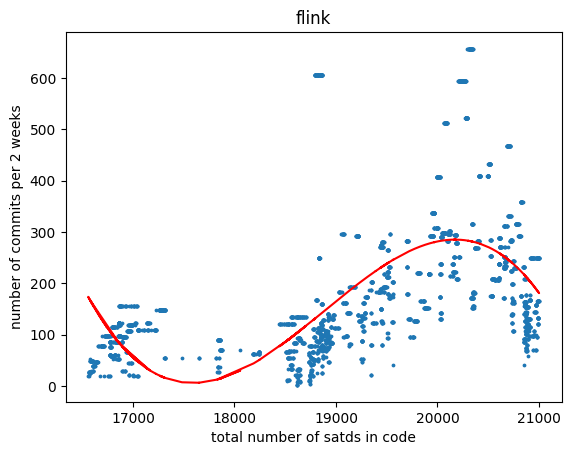

hadoop SignificanceResult(statistic=0.18149202778504095, pvalue=1.7312103749064626e-51)
MSE 27856.707594233194


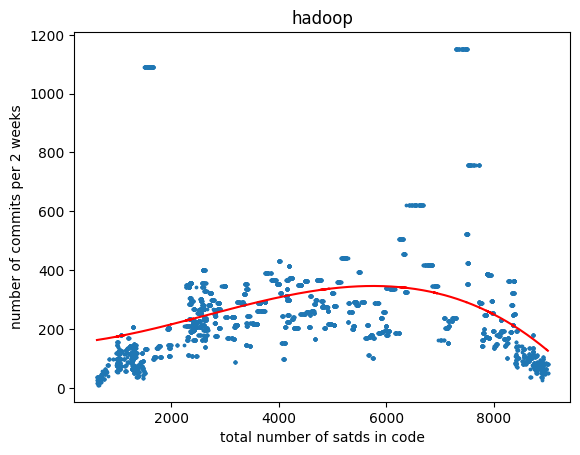

maven SignificanceResult(statistic=0.0903251870084058, pvalue=0.0004148064806083438)
MSE 10016.362222615888


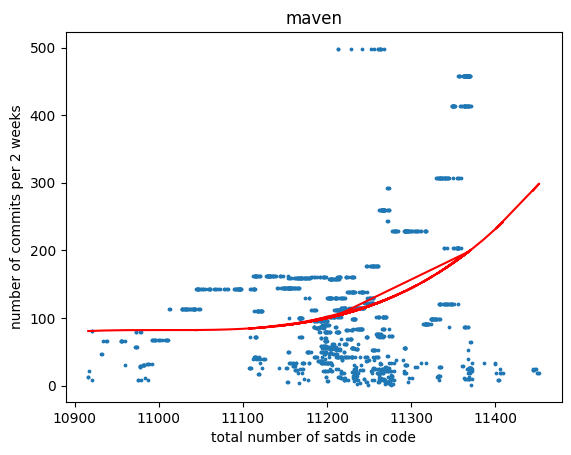

pulsar SignificanceResult(statistic=0.3751374646404989, pvalue=8.69333613110954e-21)
MSE 3992.548946949629


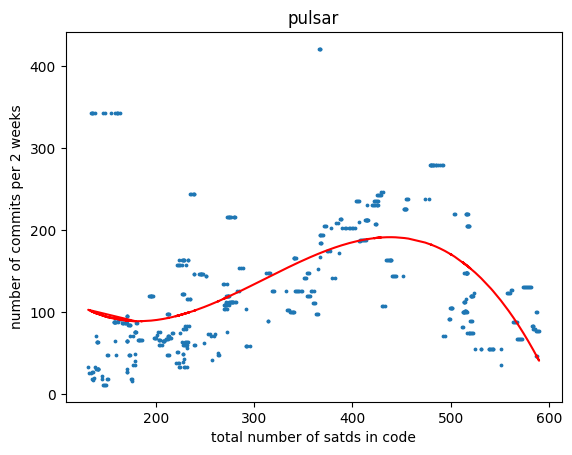

In [115]:
"""
dependence on commit speed
"""

satds = pd.read_csv("data/satds.csv")
satds["total"] = satds["code|design-debt"] + satds["test-debt"] + satds["documentation-debt"] + satds[
    "requirement-debt"]
satds["total_cumsum"] = satds["total"].cumsum()
commit_frequency = pd.read_csv("data/commit_frequency_14d.csv")

satds["timestamp"] = pd.to_datetime(satds["timestamp"], unit="s")
commit_frequency["timestamp"] = pd.to_datetime(commit_frequency["timestamp"])

for project in sorted(satds["project"].unique()):
    selection_satds = satds[satds["project"] == project].sort_values("timestamp")
    selection_commit_frequency = commit_frequency[commit_frequency["project"] == project].sort_values("timestamp")
    merged = pd.merge_asof(selection_satds, selection_commit_frequency, on="timestamp")
    print(project, stats.spearmanr(merged["total_cumsum"], merged["commits_per_14days"]))

    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(merged["total_cumsum"].to_numpy().reshape(-1, 1))
    y = merged["commits_per_14days"].to_numpy().reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    predicted = model.predict(x_poly)
    print("MSE", mean_squared_error(y, predicted))

    plt.xlabel("total number of satds in code")
    plt.ylabel("number of commits per 2 weeks")
    plt.title(project)
    plt.scatter(merged["total_cumsum"], merged["commits_per_14days"], s=3)
    plt.plot(merged["total_cumsum"], predicted, color="red")
    plt.savefig(f"plots/commit_frequency/{project}.png")
    plt.show()


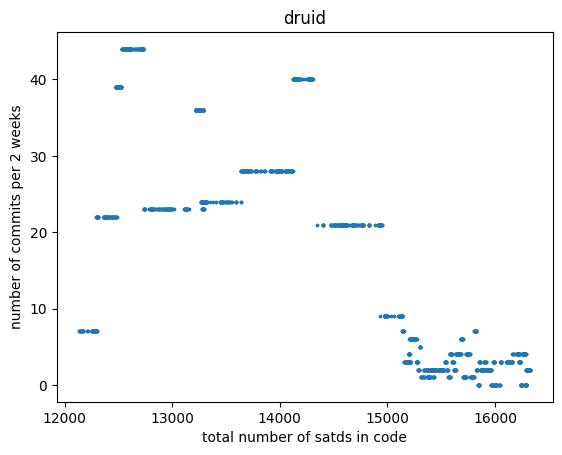

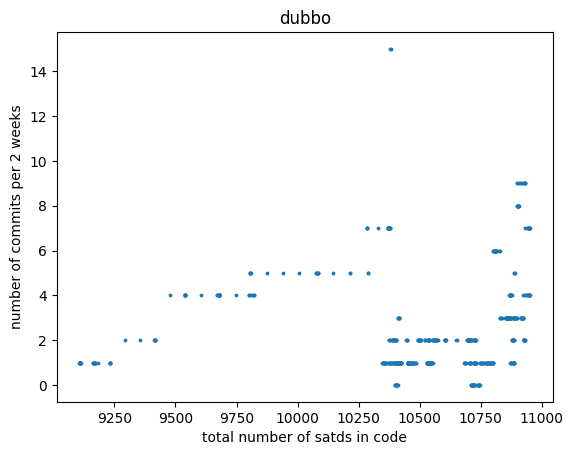

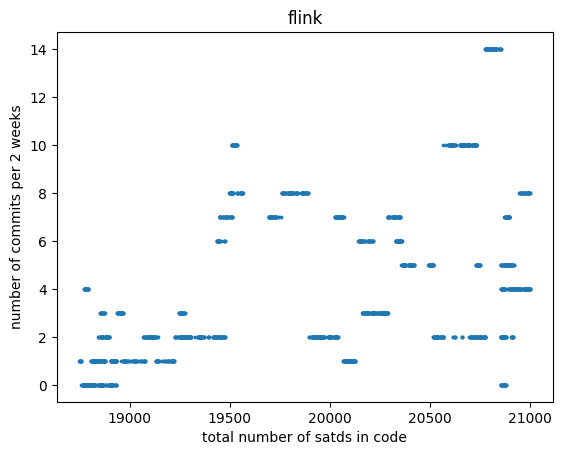

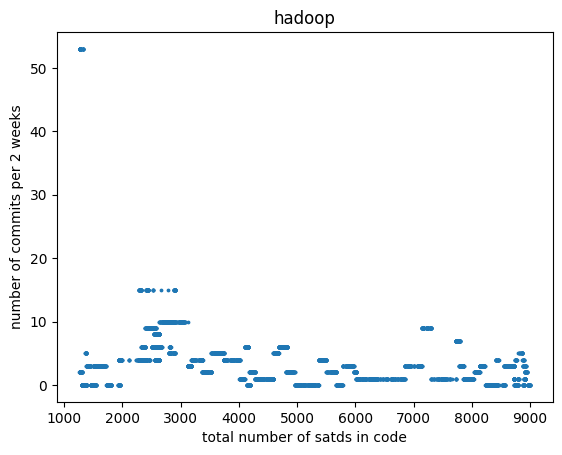

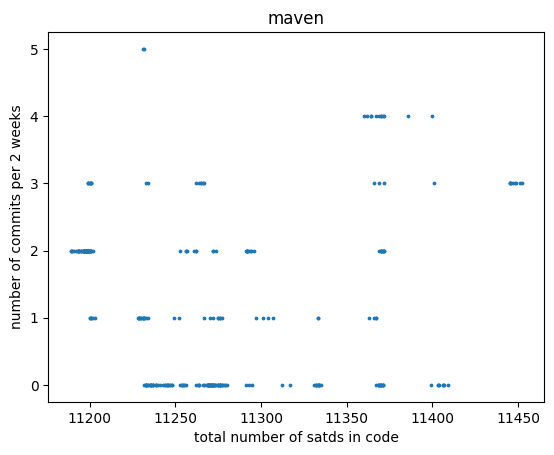

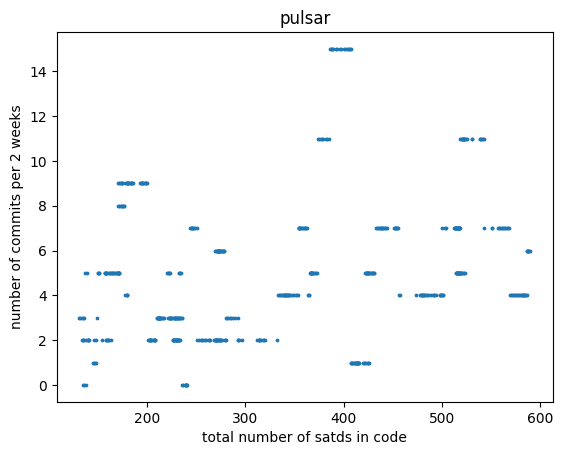

In [52]:
satds = pd.read_csv("data/satds.csv")
satds["total"] = satds["code|design-debt"] + satds["test-debt"] + satds["documentation-debt"] + satds[
    "requirement-debt"]
satds["total_cumsum"] = satds["total"].cumsum()
commit_frequency = pd.read_csv("data/release_frequency_3M.csv")

satds["timestamp"] = pd.to_datetime(satds["timestamp"], unit="s")
commit_frequency["timestamp"] = pd.to_datetime(commit_frequency["timestamp"])

for project in sorted(satds["project"].unique()):
    selection_satds = satds[satds["project"] == project].sort_values("timestamp")
    selection_commit_frequency = commit_frequency[commit_frequency["project"] == project].sort_values("timestamp")

    merged = pd.merge_asof(selection_satds, selection_commit_frequency, on="timestamp")

    plt.scatter(merged["total_cumsum"], merged["releases_per_3months"], s=3)
    plt.xlabel("total number of satds in code")
    plt.ylabel("number of commits per 2 weeks")
    plt.title(project)
    plt.show()